In [1]:
import numpy as np
import sklearn
from PIL import Image
import matplotlib.pyplot as plt
import pandas as pd
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

%matplotlib inline

In [2]:
SIZE = 28
meta = pd.read_csv('metadata.csv', delimiter=',')
data = np.loadtxt(f'hmnist_{SIZE}_{SIZE}_L.csv', delimiter=',', skiprows=1, usecols=range(SIZE * SIZE))

folder = "./baseline-lr0.001-epoch50-batchsize32"
labels = list(meta.dx.unique())

In [3]:
from tensorflow.keras.utils import to_categorical
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()

# Extract test data before applying SMOTE
X_train, X_test, y_train, y_test = train_test_split(data, to_categorical(label_encoder.fit_transform(meta.dx)), test_size=0.2, random_state=42069)

# Add SMOTE data to validate & train datas
smote = SMOTE(k_neighbors=5, random_state=42069)
X_train, y_train = smote.fit_resample(X_train, y_train)

X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, test_size=0.25, random_state=42069)


2023-03-14 21:16:15.169641: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-14 21:16:15.617898: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/home/vande/miniconda3/envs/tf/lib/
2023-03-14 21:16:15.618996: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/home/vande/miniconda3/envs/tf/lib/
2023-03-14 21:16:15.619002: W tensorflow/compiler/tf2ten

In [4]:
X_tr = np.array(X_train).reshape(len(X_train), SIZE, SIZE)
X_test = np.array(X_test).reshape(len(X_test), SIZE, SIZE)
X_validate = np.array(X_validate).reshape(len(X_validate), SIZE, SIZE)


X_tr = X_tr[:, :, :, None]
X_test = X_test[:, :, :, None]
X_validate = X_validate[:, :, :, None]

In [5]:
import keras
from keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Conv2D, MaxPool2D, Dropout, Flatten
from tensorflow.keras.optimizers import Adam

# model = keras.models.load_model(folder)

model = Sequential()
model.add(Conv2D(16, kernel_size=(3, 3), activation='leaky_relu', input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(7, activation='softmax'))
model.summary()

optimizer = Adam(learning_rate=0.001)

model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_tr, y_train, epochs=50, batch_size=32, validation_data=(X_validate, y_validate))


2023-03-14 21:16:17.023915: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open file to read NUMA node: /sys/bus/pci/devices/0000:06:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-03-14 21:16:17.033864: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open file to read NUMA node: /sys/bus/pci/devices/0000:06:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-03-14 21:16:17.033920: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open file to read NUMA node: /sys/bus/pci/devices/0000:06:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-03-14 21:16:17.034630: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 16)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 2704)              0         
                                                                 
 dense (Dense)               (None, 7)                 18935     
                                                                 
Total params: 19,095
Trainable params: 19,095
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50


e
Your kernel may have been built without NUMA support.
2023-03-14 21:16:17.035254: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open file to read NUMA node: /sys/bus/pci/devices/0000:06:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-03-14 21:16:17.035298: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open file to read NUMA node: /sys/bus/pci/devices/0000:06:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-03-14 21:16:17.517736: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open file to read NUMA node: /sys/bus/pci/devices/0000:06:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-03-14 21:16:17.517822: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open file to read NUMA node: /sys/bus/pci/devices/0000:06:00.0/numa_node
Your kernel may have been built without NUMA s

881/881 [==============================] - 6s 5ms/step - loss: 5.5370 - accuracy: 0.3468 - val_loss: 1.5414 - val_accuracy: 0.4574
Epoch 2/50
881/881 [==============================] - 5s 5ms/step - loss: 1.2715 - accuracy: 0.5662 - val_loss: 1.2386 - val_accuracy: 0.5730
Epoch 3/50
881/881 [==============================] - 5s 6ms/step - loss: 1.0352 - accuracy: 0.6481 - val_loss: 0.9775 - val_accuracy: 0.6861
Epoch 4/50
881/881 [==============================] - 5s 6ms/step - loss: 0.9081 - accuracy: 0.6972 - val_loss: 0.9289 - val_accuracy: 0.7066
Epoch 5/50
881/881 [==============================] - 5s 6ms/step - loss: 0.8121 - accuracy: 0.7290 - val_loss: 0.8460 - val_accuracy: 0.7411
Epoch 6/50
881/881 [==============================] - 4s 5ms/step - loss: 0.7583 - accuracy: 0.7501 - val_loss: 0.8742 - val_accuracy: 0.7414
Epoch 7/50
881/881 [==============================] - 5s 6ms/step - loss: 0.6781 - accuracy: 0.7770 - val_loss: 0.7056 - val_accuracy: 0.7813
Epoch 8/50
881/88

In [6]:
def plot_model_history(model_history):
    print(model_history.history.keys)
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['accuracy'])+1),model_history.history['accuracy'])
    axs[0].plot(range(1,len(model_history.history['val_accuracy'])+1),model_history.history['val_accuracy'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    # axs[0].set_xticks(np.arange(1,len(model_history.history['accuracy'])+1),len(model_history.history['accuracy'])//10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    # axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

294/294 [==============================] - 1s 4ms/step - loss: 0.7109 - accuracy: 0.8714
Validation: accuracy = 0.871435  ;  loss = 0.710937
<built-in method keys of dict object at 0x7f97cbbec740>


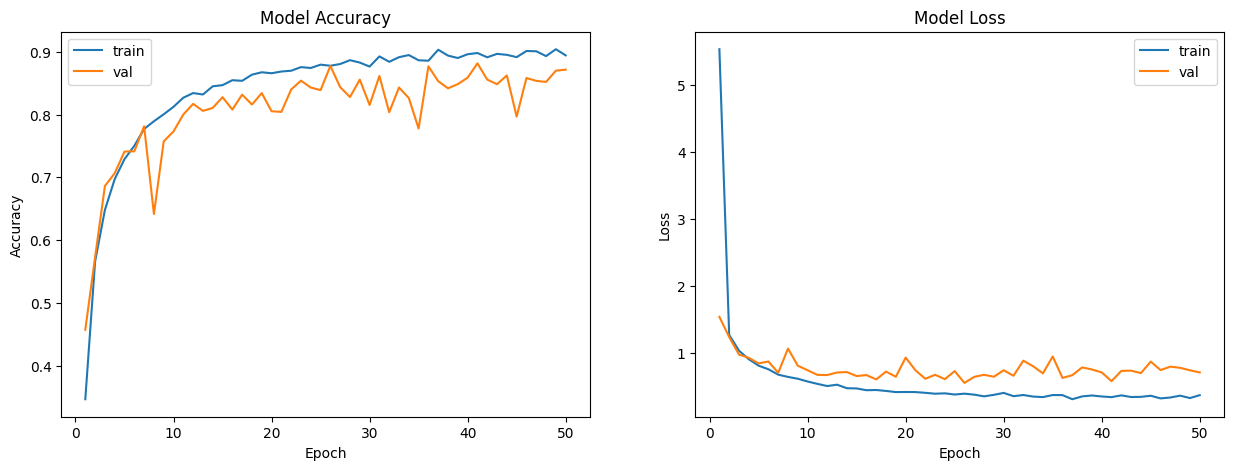

In [11]:
# test = model.evaluate(X_test, y_test)

# model = keras.models.load_model("./baseline-lr0.001-epoch150-batchsize32")
loss, accuracy = model.evaluate(X_validate, y_validate, verbose=1)
# loss_v, accuracy_v = model.evaluate(X_validate, y_validate, verbose=1)
# print("Validation: accuracy = %f  ;  loss_v = %f" % (accuracy_v, loss_v))

print("Validation: accuracy = %f  ;  loss = %f" % (accuracy, loss))
plot_model_history(history)

In [8]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

63/63 [==============================] - 0s 2ms/step
(2003, 7)
63/63 [==============================] - 0s 3ms/step - loss: 5.4655 - accuracy: 0.4978
Test: accuracy = 0.497753  ;  loss = 5.465473


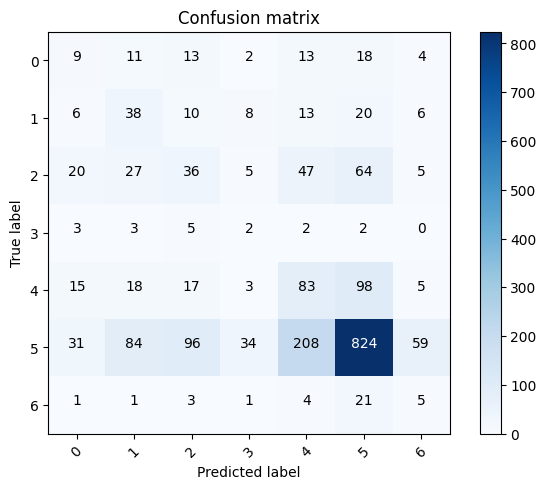

In [9]:
from sklearn.metrics import confusion_matrix

Y_pred = model.predict(X_test)
print(Y_pred.shape)
Y_pred_classes = np.argmax(Y_pred, axis = 1) 
Y_true = np.argmax(y_test, axis = 1) 
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)
plot_confusion_matrix(confusion_mtx, classes = range(7)) 

loss_t, accuracy_t = model.evaluate(X_test, y_test, verbose=1)
print("Test: accuracy = %f  ;  loss = %f" % (accuracy_t, loss_t))

In [10]:
from sklearn.metrics import classification_report

model.save(folder)

with open(folder + "/scores.txt", "w") as f:
    f.write(classification_report(Y_true, Y_pred.argmax(axis=1), target_names=labels))


INFO:tensorflow:Assets written to: ./baseline-lr0.001-epoch50-batchsize32/assets


INFO:tensorflow:Assets written to: ./baseline-lr0.001-epoch50-batchsize32/assets
